In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [ ]:
df=pd.read_csv("/content/AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [ ]:
df.shape

(1065286, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065286 entries, 0 to 1065285
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1065286 non-null  int64  
 1   type            1065286 non-null  object 
 2   amount          1065286 non-null  float64
 3   nameOrig        1065286 non-null  object 
 4   oldbalanceOrg   1065286 non-null  float64
 5   newbalanceOrig  1065286 non-null  float64
 6   nameDest        1065286 non-null  object 
 7   oldbalanceDest  1065286 non-null  float64
 8   newbalanceDest  1065285 non-null  float64
 9   isFraud         1065285 non-null  float64
 10  isFlaggedFraud  1065285 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 89.4+ MB


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,1063893
1.0,1392


In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,1065285


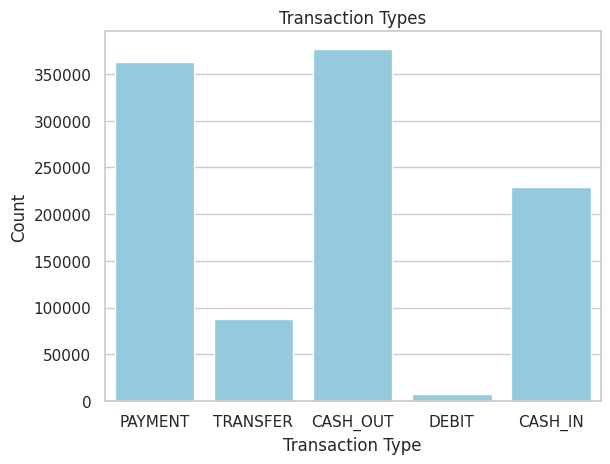

In [ ]:
sns.countplot(data=df,x='type',color='skyblue')

plt.title('Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.show()

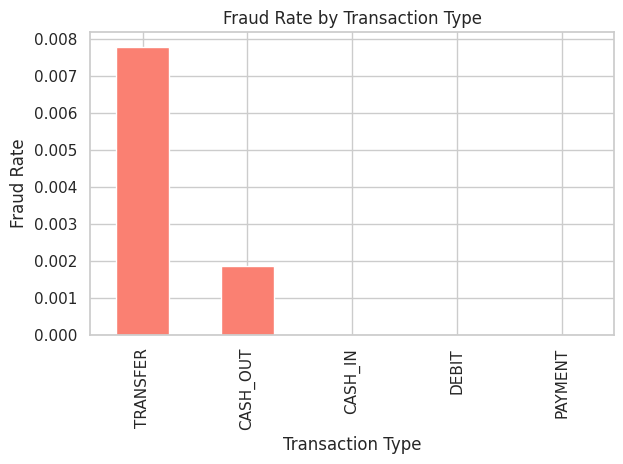

In [ ]:
fraud_by_type = df.groupby("type")['isFraud'].mean().sort_values(ascending=False)

# Now this is a proper Series you can plot
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='salmon')

plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.show()


In [ ]:
df['amount'].describe().astype(int)

,amount
count,1065286
mean,158251
std,267165
min,0
25%,11916
50%,75049
75%,212881
max,10000000


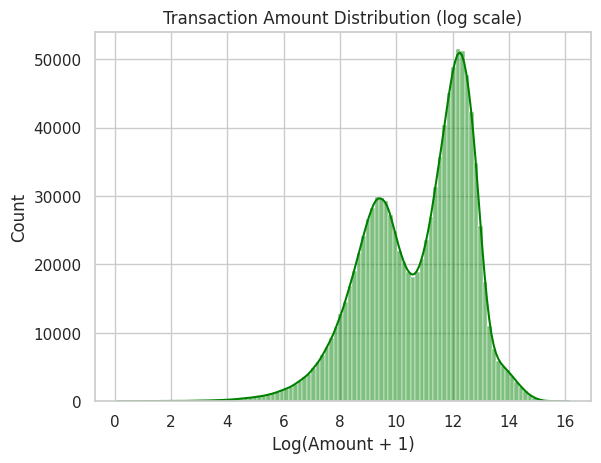

In [ ]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

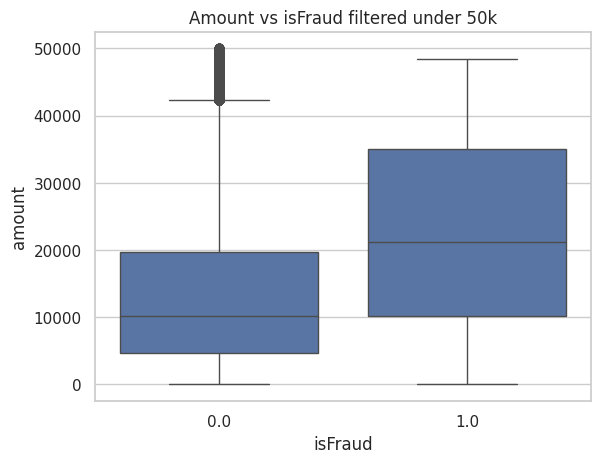

In [ ]:
sns.boxplot(data=df[df["amount"]<50000],x='isFraud',y='amount')
plt.title('Amount vs isFraud filtered under 50k')
plt.show()

In [ ]:
df['balanceDiffOrig']=df['oldbalanceOrg']-df["newbalanceOrig"]
df['balanceDiffDest']=df['newbalanceDest']-df['oldbalanceOrg']

In [ ]:
(df['balanceDiffOrig']<0).sum()

np.int64(229548)

In [ ]:
(df['balanceDiffDest']<0).sum()

np.int64(426523)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,-170136.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,-21249.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,-181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-181.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,-41554.0


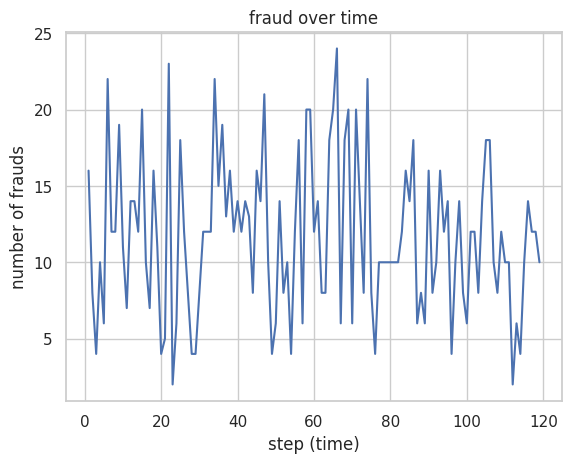

In [ ]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label='Frauds per Step')
plt.xlabel("step (time)")
plt.ylabel("number of frauds")
plt.title("fraud over time")
plt.show()


In [ ]:
df.drop(columns="step",inplace=True)

In [ ]:
top_senders=df['nameOrig'].value_counts().head(1)

In [ ]:
top_senders

,count
nameOrig,
C457997071,2


In [ ]:
top_receivers=df['nameDest'].value_counts().head(10)

In [ ]:
top_receivers

,count
nameDest,
C985934102,98
C1286084959,96
C1590550415,89
C248609774,88
C665576141,87
C2083562754,86
C977993101,82
C1360767589,81
C451111351,80


In [ ]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [ ]:
fraud_users

,count
nameOrig,
C1788320123,1
C1720181306,1
C1348396248,1
C611232899,1
C835169130,1
C267854618,1
C1728211150,1
C802639228,1
C1868920588,1


In [ ]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [ ]:
fraud_types['type'].value_counts()

,count
type,
CASH_OUT,376734
TRANSFER,88302


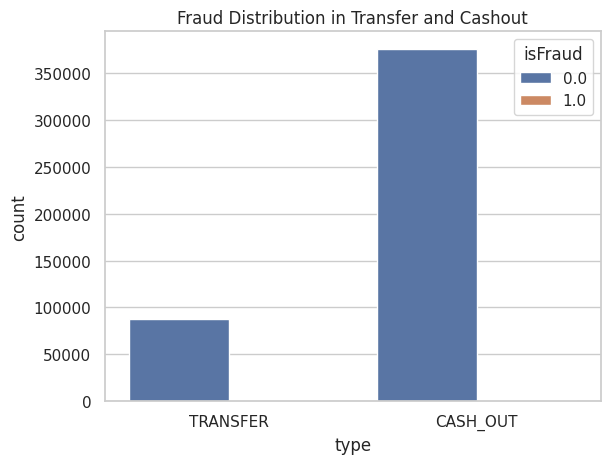

In [ ]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title("Fraud Distribution in Transfer and Cashout")
plt.show()

In [ ]:
corr=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

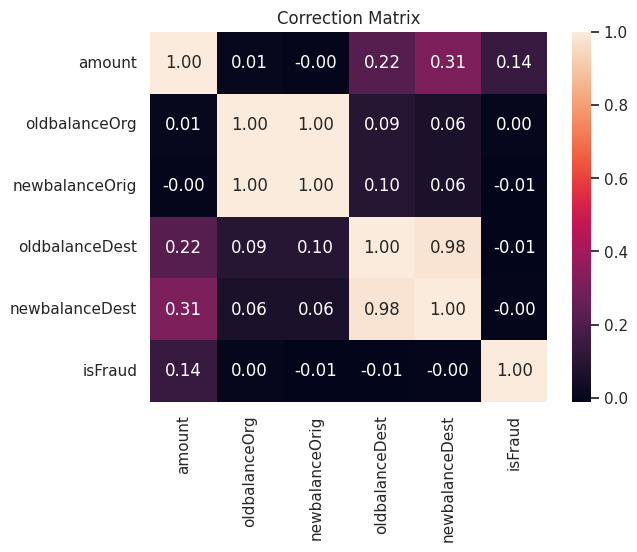

In [ ]:
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correction Matrix")
plt.show()

In [ ]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0)&
    (df['newbalanceOrig']==0)&
    (df['type'].isin(["TRANSFER",'CASH_OUT']))

]

In [ ]:
len(zero_after_transfer)

194521

In [ ]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,-181.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,-181.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,36188.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,-705.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,2708337.89


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,1063893
1.0,1392


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
 df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,-170136.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,-21249.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,-181.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-181.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,-41554.0


In [ ]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [ ]:
categorical=["type"]
numeric=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
df_model.dropna(inplace=True)


In [ ]:
y=df_model['isFraud']
X=df_model.drop("isFraud",axis=1)

In [ ]:
print(X.select_dtypes(include=['object']).columns)


Index(['type'], dtype='object')


In [ ]:
# X=X.drop(['type'],axis=1)
# X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [ ]:
from imblearn.over_sampling import SMOTE
pipeline = Pipeline([
    ('prep', preprocessor),
    ('smote',SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    319168
         1.0       0.02      0.97      0.04       418

    accuracy                           0.94    319586
   macro avg       0.51      0.96      0.51    319586
weighted avg       1.00      0.94      0.97    319586



In [ ]:
confusion_matrix(y_test,y_pred)

array([[300800,  18368],
       [    13,    405]])

In [ ]:
pipeline.score(X_test,y_test)*100

94.24849649233697

In [152]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']